## Autoencoders for Anomaly Detection: A Comprehensive Tutorial

We'll use a credit card fraud dataset from Kaggle. It contains transactions labeled as fraudulent or normal.

## Loading the Data

# 📌 Credit Card Fraud Detection - Data Preprocessing  

This Implementation **prepares the dataset** for **anomaly detection** in credit card transactions.  

## 🔹 **Key Steps in Preprocessing**  
### 1️⃣ **Load Dataset**  
- Reads the **credit card dataset** (`creditcard.csv`) using **pandas**.  
- Drops any **missing values** (`NaN`).  

### 2️⃣ **Feature Normalization**  
- Uses **StandardScaler** to **normalize** all features (except the target class).  
- Ensures that features have **zero mean** and **unit variance**, improving model performance.  

### 3️⃣ **Data Splitting**  
- **80% Training Set**, **20% Test Set** (using `train_test_split`).  
- **Separates Normal Transactions (`Class = 0`) from Anomalies (`Class = 1`)**:
  - `train_normal`: **Normal training transactions (without labels).**  
  - `test_normal`: **Normal test transactions.**  
  - `test_anomalies`: **Anomalous test transactions (fraud cases).**  

## 🎯 **Why is this Important?**  
✅ **Fraud detection requires anomaly detection techniques.** 🔍  
✅ **Standardization prevents features with large values from dominating.** ⚖️  
✅ **Training on only normal transactions helps unsupervised models detect anomalies better.** 📊  

🚀 **Dataset is now ready for model training!**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("creditcard.csv")
df = df.dropna()

# Normalize features
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Splitting data
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_normal = train[train['Class'] == 0].drop('Class', axis=1)
test_normal = test[test['Class'] == 0].drop('Class', axis=1)
test_anomalies = test[test['Class'] == 1].drop('Class', axis=1)

## Building the Autoencoder

# 🔍 **Autoencoder for Credit Card Fraud Detection**  

## 🏗 **Building an Autoencoder Model**  
This script defines and compiles an **Autoencoder Neural Network** using **TensorFlow/Keras** to detect fraud in credit card transactions.  

### 🚀 **Autoencoder Architecture**  
✅ **Input Layer**: Accepts transaction features.  
✅ **Encoder**:  
   - **32 neurons** (ReLU activation).  
   - **16 neurons** (ReLU activation).  
   - **8 neurons** (ReLU activation, bottleneck layer).  
✅ **Decoder**:  
   - **16 neurons** (ReLU activation).  
   - **32 neurons** (ReLU activation).  
   - **Output Layer**: Reconstructs input using **sigmoid activation**.  

### 🎯 **Purpose of Autoencoder**  
- Trains on **only normal transactions** to **learn normal patterns**.  
- **Reconstruction error** helps identify **anomalous (fraudulent) transactions**.  
- Uses **MSE (Mean Squared Error)** loss for reconstruction accuracy.  
- Optimized using **Adam optimizer**.  

🚀 **Autoencoder is now ready for training!** 🏋️‍♂️  

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

# Define encoder
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(32, activation='relu')(input_layer)
    encoded = Dense(16, activation='relu')(encoded)
    encoded = Dense(8, activation='relu')(encoded)
    
    # Decoder
    decoded = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)
    
    autoencoder = keras.Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Instantiate model
input_dim = train_normal.shape[1]
autoencoder = build_autoencoder(input_dim)

## Training the Autoencoder

# 📊 **Training the Autoencoder**  

### 🏋️ **Training Details**  
✅ **Dataset**: Trained only on **normal transactions** (fraud-free data).  
✅ **Epochs**: 50 (number of training iterations).  
✅ **Batch Size**: 64 (number of samples per training step).  
✅ **Validation Split**: 10% of normal data used for validation.  
✅ **Loss Function**: **Mean Squared Error (MSE)**.  
✅ **Optimizer**: **Adam** (adaptive learning rate).  

### 🚀 **Training Process**  
- The autoencoder **learns to reconstruct normal transactions** efficiently.  
- It **minimizes reconstruction error** for normal data.  
- Later, high reconstruction errors on **fraudulent transactions** indicate **anomalies**.  

In [4]:
history = autoencoder.fit(train_normal, train_normal, epochs=50, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.9052 - val_loss: 0.8160
Epoch 2/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8414 - val_loss: 0.7955
Epoch 3/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7981 - val_loss: 0.7830
Epoch 4/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7910 - val_loss: 0.7784
Epoch 5/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7911 - val_loss: 0.7755
Epoch 6/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7759 - val_loss: 0.7724
Epoch 7/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7702 - val_loss: 0.7691
Epoch 8/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7729 - val_loss: 0.7682
Epoch 9/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.7675 - val_loss: 0.7651
Epoch 10/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7727 - val_loss: 0.7644
Epoch 11/50
3199/3199 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7564 - val_loss: 0.7624
Epoch 12/50
3199/3199 ━━━━━━━

## Plot Training Loss

# 📉 **Autoencoder Training Loss Plot**  

### 📌 **Loss Curves Analysis**  
- **Blue Line (Train Loss)**: Measures reconstruction error on **training data**.  
- **Orange Line (Validation Loss)**: Measures reconstruction error on **validation data**.  




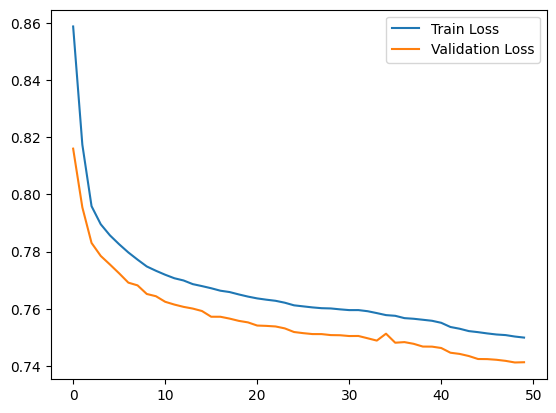

In [5]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 🔍 **Key Observations**  
✅ Loss should **decrease** over epochs, showing **improved reconstruction**.  
✅ If **validation loss diverges** from train loss, it indicates **overfitting**.  
✅ A **stable gap** between train and val loss is **ideal** for generalization.  

🔮 **Next Step:** Use the trained model to **detect anomalies**! 🚀  

## Evaluating Anomaly Detection Performance

# 📊 **Reconstruction Error Distribution**  

### 📌 **What This Tells Us**  
- **X-Axis (Reconstruction Error):** Measures how different reconstructed data is from original.  
- **Y-Axis (Frequency):** Number of samples falling into each error range.  

### 🔍 **Key Insights**  
✅ **Low errors (left side)** = Normal transactions.  
✅ **High errors (right side)** = Potential anomalies (fraudulent transactions).  
✅ A **clear threshold** can be set to classify anomalies.  


1777/1777 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


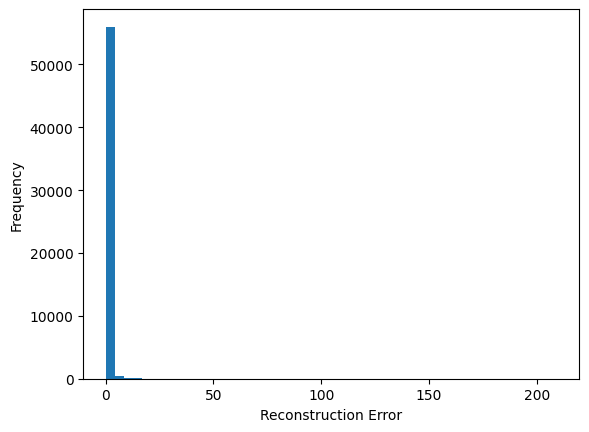

In [6]:
reconstructed = autoencoder.predict(test_normal)
mse = np.mean(np.power(test_normal - reconstructed, 2), axis=1)

plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()

## Setting a Threshold for Anomaly Detection

In [7]:
threshold = np.percentile(mse, 90)
print("Anomaly Threshold:", threshold)

Anomaly Threshold: 1.0209578369863188


In [8]:
reconstructed_anomalies = autoencoder.predict(test_anomalies)
anomaly_mse = np.mean(np.power(test_anomalies - reconstructed_anomalies, 2), axis=1)

anomaly_predictions = anomaly_mse > threshold
print("Detected Anomalies:", np.sum(anomaly_predictions))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Detected Anomalies: 90


## Detecting Fraudulent Transactions
## 🔍 **Detecting Anomalies with the Autoencoder**

### 📊 **Anomaly Detection Process**
- The autoencoder **reconstructs the anomalous transactions**.
- The **Mean Squared Error (MSE)** is calculated between original and reconstructed anomalies.
- If the **MSE exceeds the threshold**, the transaction is flagged as an anomaly.

### 🚨 **Results**
- The model predicts anomalies based on reconstruction error.
- **Total Detected Anomalies**: Computed by comparing errors against the threshold.


## Advanced Concepts: Variational Autoencoders (VAEs)

In [10]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K

# Custom VAE loss
def vae_loss(x, x_decoded_mean):
    reconstruction_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss

## 🔬 **Custom Variational Autoencoder (VAE) Loss Function**

### 📉 **VAE Loss Components**
1. **Reconstruction Loss** 🎯  
   - Measures how well the **decoded data** matches the **original input**.  
   - Uses **Binary Cross-Entropy (BCE)** to compute the reconstruction error.  

2. **KL Divergence Loss** 📏  
   - Ensures the **learned latent space** follows a **Gaussian distribution**.  
   - Calculated as:  
     \[
     KL = -0.5 \sum(1 + \log(\sigma^2) - \mu^2 - \sigma^2)
     \]
   - Helps with **regularization** by preventing overfitting.  

### ⚙️ **Final Loss Function**
- The total **VAE loss** is the sum of **reconstruction loss** and **KL divergence loss**.  
- This balances **data reconstruction accuracy** with **latent space regularization**.  


 ## Advanced Concepts: Transformer-based Autoencoders

In [11]:
from transformers import TFAutoModel

# Transformer Encoder
class TransformerAutoencoder(tf.keras.Model):
    def __init__(self, input_dim):
        super(TransformerAutoencoder, self).__init__()
        self.encoder = TFAutoModel.from_pretrained("bert-base-uncased")
        self.decoder = Dense(input_dim, activation='sigmoid')
    
    def call(self, x):
        encoded = self.encoder(x)[0]
        return self.decoder(encoded)

## 🤖 **Transformer-Based Autoencoder**

### 🔍 **Model Overview**
- Utilizes a **pretrained BERT model** (`bert-base-uncased`) as the **encoder**.  
- A **fully connected layer (Dense layer)** serves as the **decoder**.  

### ⚙️ **How It Works**
1. **Encoding Phase** 🚀  
   - Input data is passed through **BERT**, extracting contextual representations.  
2. **Decoding Phase** 🔄  
   - The **Dense layer** reconstructs the original input using a **sigmoid activation function**.  

### 📌 **Why Use Transformers?**
✔ **Captures complex dependencies** in data.  
✔ **Leverages transfer learning** for efficient encoding.  
✔ **Ideal for sequential and structured data reconstruction.**  
